**Applications of Random Forest and AdaBoost Ensemble Techniques**


**Name: Apurva Narayan**


**3122 21 5001 011**






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns


In [2]:
# Step 1: Loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ["ID", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area",
           "Mean Smoothness", "Mean Compactness", "Mean Concavity", "Mean Concave Points",
           "Mean Symmetry", "Mean Fractal Dimension", "SE Radius", "SE Texture", "SE Perimeter",
           "SE Area", "SE Smoothness", "SE Compactness", "SE Concavity", "SE Concave Points",
           "SE Symmetry", "SE Fractal Dimension", "Worst Radius", "Worst Texture", "Worst Perimeter",
           "Worst Area", "Worst Smoothness", "Worst Compactness", "Worst Concavity", "Worst Concave Points",
           "Worst Symmetry", "Worst Fractal Dimension"]
data = pd.read_csv(url,names=columns)

In [3]:
#Step 2: Preprocessing
#Handling missing values
data.isnull().sum()

ID                         0
Diagnosis                  0
Mean Radius                0
Mean Texture               0
Mean Perimeter             0
Mean Area                  0
Mean Smoothness            0
Mean Compactness           0
Mean Concavity             0
Mean Concave Points        0
Mean Symmetry              0
Mean Fractal Dimension     0
SE Radius                  0
SE Texture                 0
SE Perimeter               0
SE Area                    0
SE Smoothness              0
SE Compactness             0
SE Concavity               0
SE Concave Points          0
SE Symmetry                0
SE Fractal Dimension       0
Worst Radius               0
Worst Texture              0
Worst Perimeter            0
Worst Area                 0
Worst Smoothness           0
Worst Compactness          0
Worst Concavity            0
Worst Concave Points       0
Worst Symmetry             0
Worst Fractal Dimension    0
dtype: int64

In [4]:
# Drop ID column (since it won't affect the result)
data.drop("ID", axis=1, inplace=True)

# Encoding Diagnosis (M = 1, B = 0)
data["Diagnosis"] = data["Diagnosis"].map({'M': 1, 'B': 0})

# Separate numerical columns for normalization and standardization
numerical_columns = data.columns[1:]

In [5]:
# Normalization
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Standardization
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [6]:
# Step 3: Exploratory Data Analysis (EDA)
data.describe()

,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
count,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02
mean,0.372583,-1.186319e-16,2.591171e-16,1.123881e-16,-1.248757e-16,-2.622390e-16,-7.492542e-17,-7.492542e-17,-6.243785e-17,2.372638e-16,...,7.492542e-17,1.248757e-17,-9.990056e-17,-4.995028e-17,-7.492542e-17,-1.498508e-16,0.000000,-1.373633e-16,2.497514e-16,9.990056e-17
std,0.483918,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00
min,0.000000,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,0.000000,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-0.756514,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,0.000000,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-0.218232,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,1.000000,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,0.531141,7.125100e-01,4.501382e-01,4.507624e-01
max,1.000000,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669,2.685877e+00,6.046041e+00,6.846856e+00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    int64  
 1   Mean Radius              569 non-null    float64
 2   Mean Texture             569 non-null    float64
 3   Mean Perimeter           569 non-null    float64
 4   Mean Area                569 non-null    float64
 5   Mean Smoothness          569 non-null    float64
 6   Mean Compactness         569 non-null    float64
 7   Mean Concavity           569 non-null    float64
 8   Mean Concave Points      569 non-null    float64
 9   Mean Symmetry            569 non-null    float64
 10  Mean Fractal Dimension   569 non-null    float64
 11  SE Radius                569 non-null    float64
 12  SE Texture               569 non-null    float64
 13  SE Perimeter             569 non-null    float64
 14  SE Area                  5

In [ ]:
data.shape

(569, 31)

In [8]:
data.columns

Index(['Diagnosis', 'Mean Radius', 'Mean Texture', 'Mean Perimeter',
       'Mean Area', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity',
       'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dimension',
       'SE Radius', 'SE Texture', 'SE Perimeter', 'SE Area', 'SE Smoothness',
       'SE Compactness', 'SE Concavity', 'SE Concave Points', 'SE Symmetry',
       'SE Fractal Dimension', 'Worst Radius', 'Worst Texture',
       'Worst Perimeter', 'Worst Area', 'Worst Smoothness',
       'Worst Compactness', 'Worst Concavity', 'Worst Concave Points',
       'Worst Symmetry', 'Worst Fractal Dimension'],
      dtype='object')

In [9]:
data['Diagnosis'].value_counts()

Diagnosis
0    357
1    212
Name: count, dtype: int64

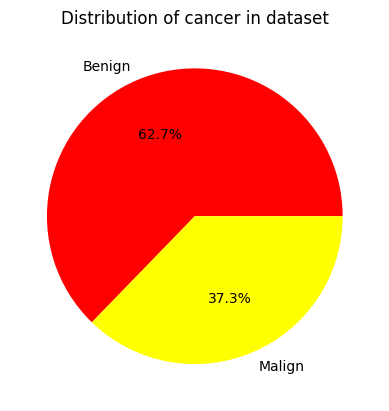

In [10]:
#Visualising distribution of cancer types using pie chart
plt.pie(data['Diagnosis'].value_counts(), colors=['red','yellow'], labels = ['Benign', 'Malign'], autopct = '%1.1f%%')
#autopct='%1.1f%%' formats the numeric values displayed on the pie chart to show one decimal place followed by a percentage sign. This means each segment of the pie chart will display the percentage of the whole.
plt.title("Distribution of cancer in dataset")
plt.show()

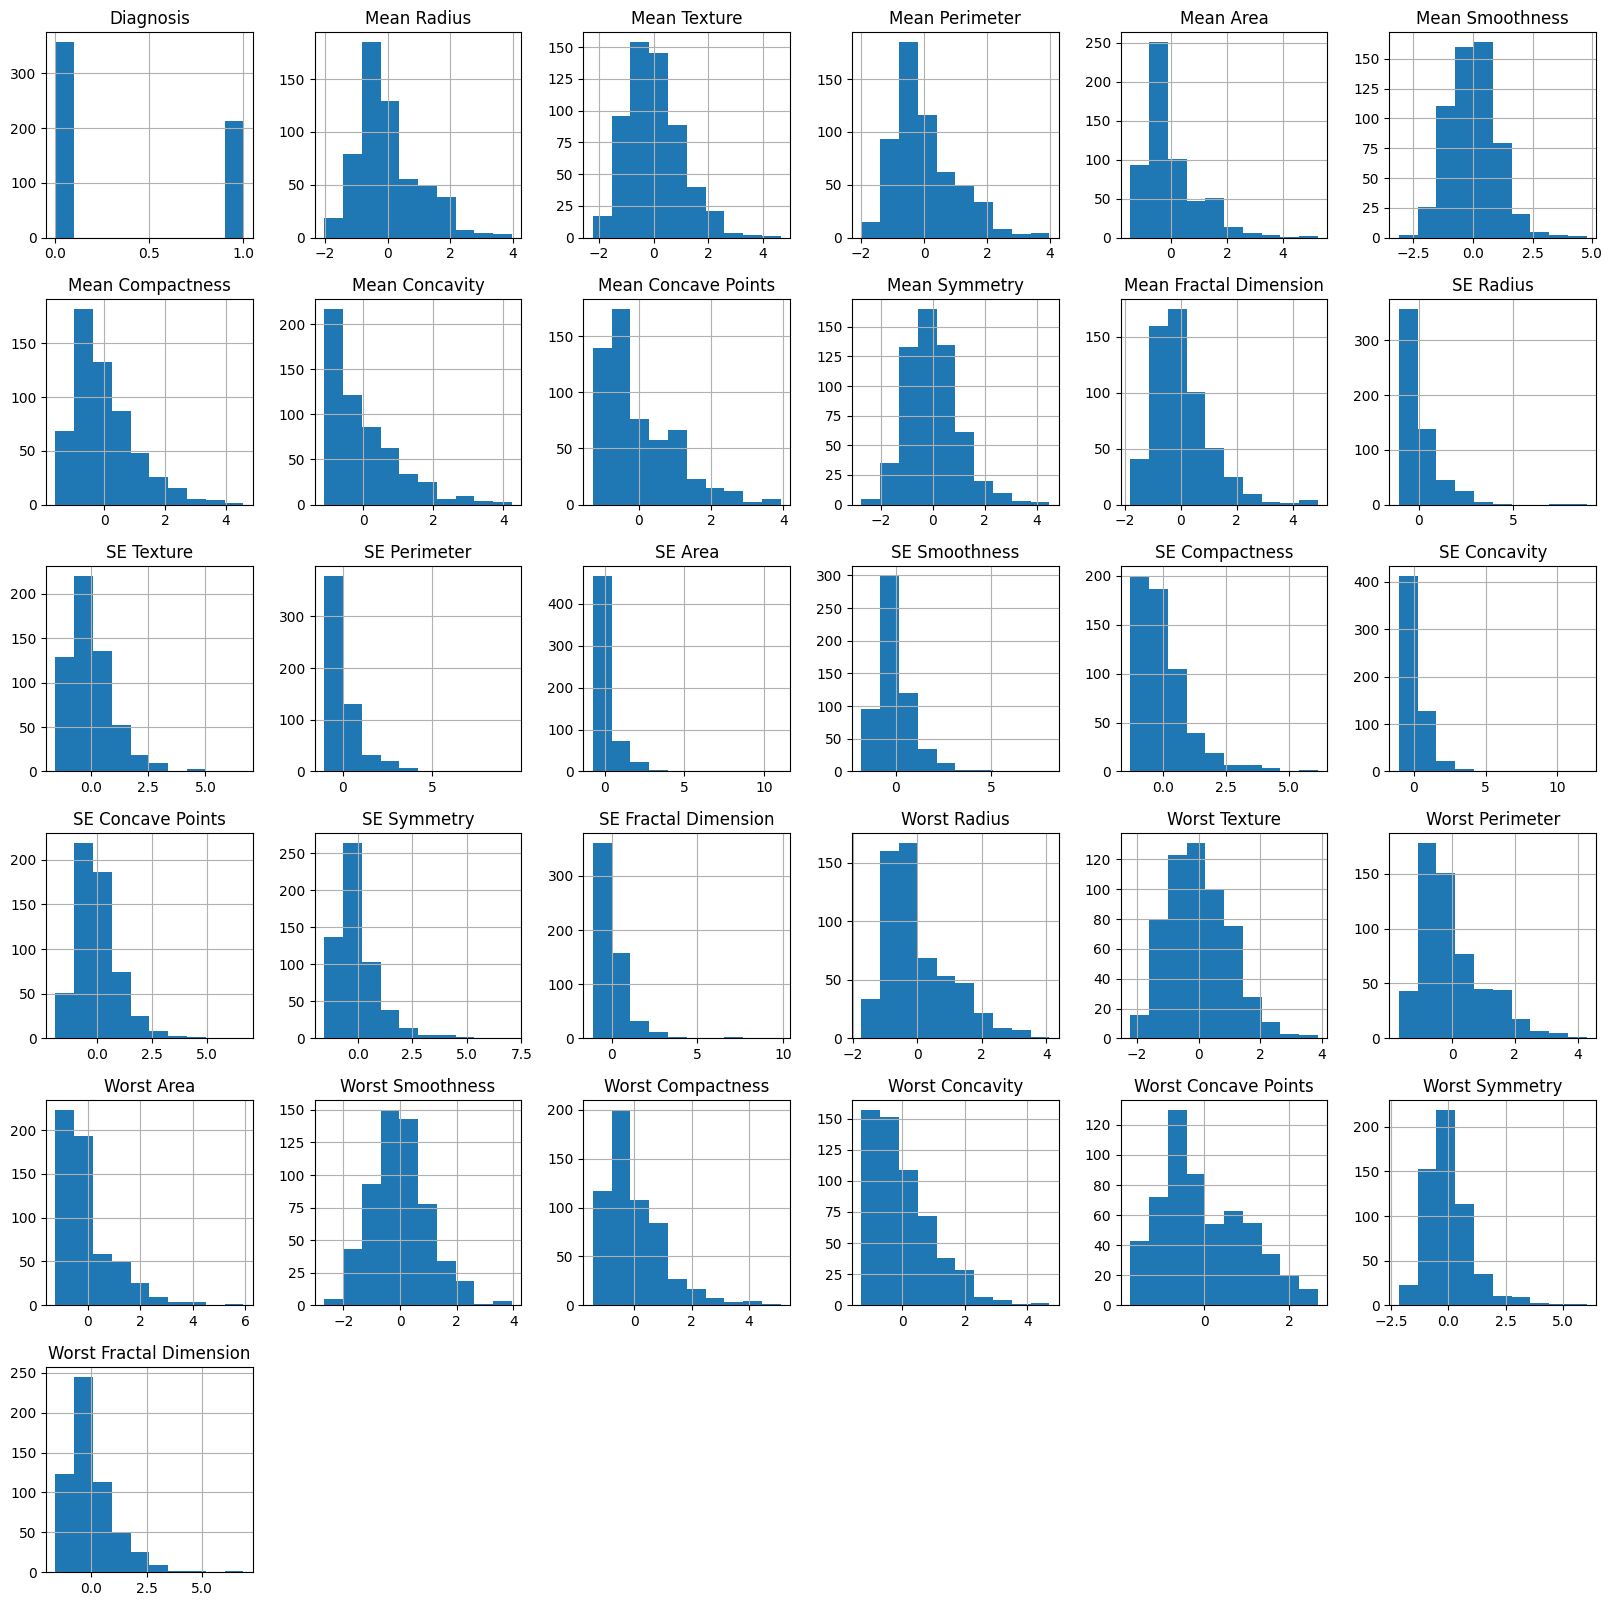

In [11]:
# Visualize feature distributions
data.hist(figsize=(20, 20))
plt.show()

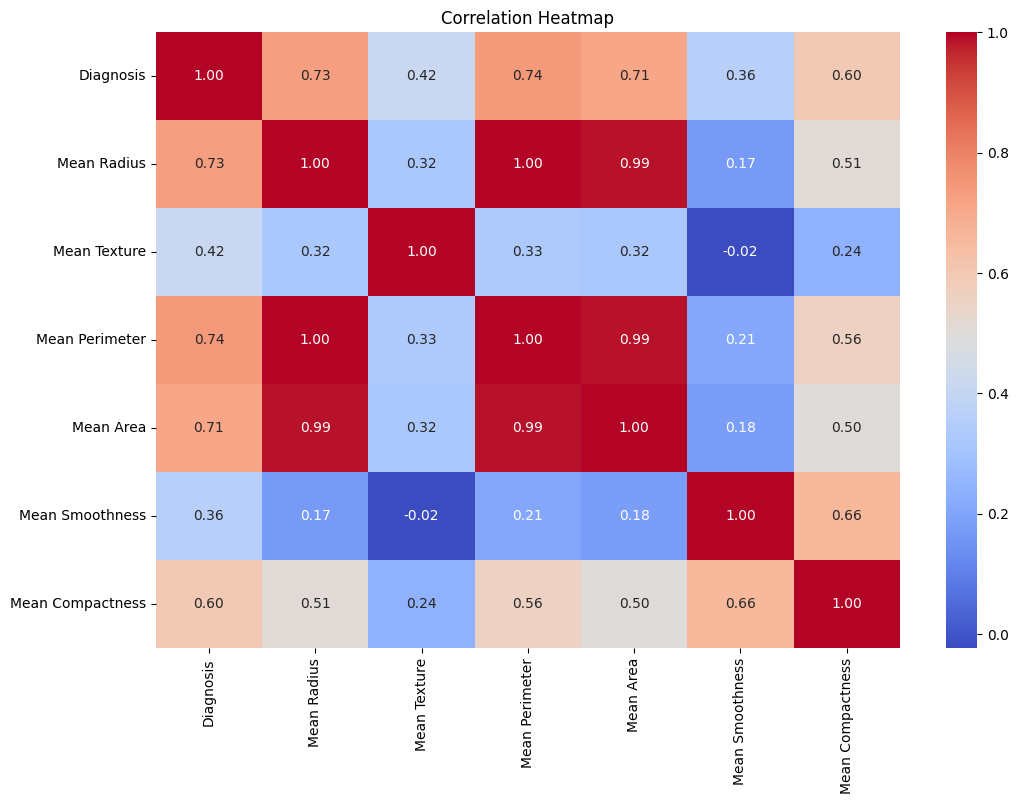

In [ ]:
# Create correlation heatmap
sec_columns = ["Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", "Mean Smoothness", "Mean Compactness"]
selected_data = data[sec_columns]

# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Using SelectKBest for feature selection
k = 10  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X= selector.fit_transform(X, y)

In [ ]:
# Step 5: Split the data into training, testing, and validation sets
X = data.drop("Diagnosis", axis=1)
y = data["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:

# Step 6: Train the model
# Ensemble Models: Bagging, Random Forest, AdaBoost
bagging_clf = BaggingClassifier(random_state=42)
bagging_clf.fit(X_train, y_train)

rf_clf = RandomForestClassifier(random_state=42, max_depth=5)
rf_clf.fit(X_train, y_train)

adaboost_clf = AdaBoostClassifier(random_state=42)
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
# Step 7: Test the model

y_pred_bagging = bagging_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_adaboost = adaboost_clf.predict(X_test)

In [ ]:
# Step 8: Measure the performance of the trained model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

print("Bagging Accuracy:", accuracy_bagging)
print("Random Forest Accuracy:", accuracy_rf)
print("AdaBoost Accuracy:", accuracy_adaboost)

Bagging Accuracy: 0.9532163742690059
Random Forest Accuracy: 0.9707602339181286
AdaBoost Accuracy: 0.9649122807017544


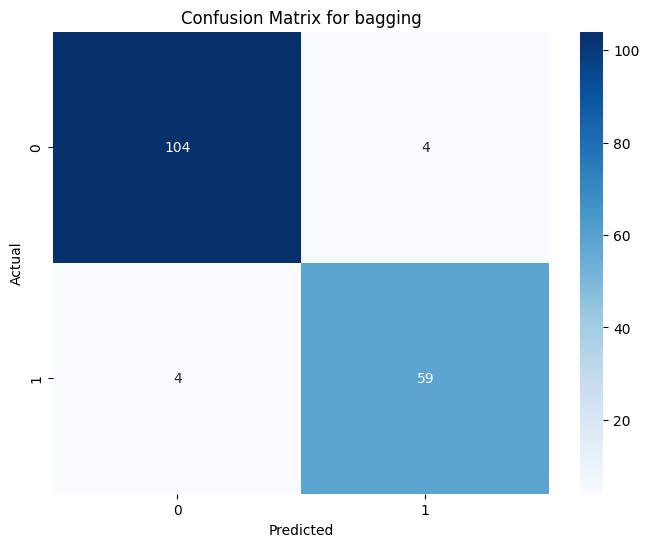

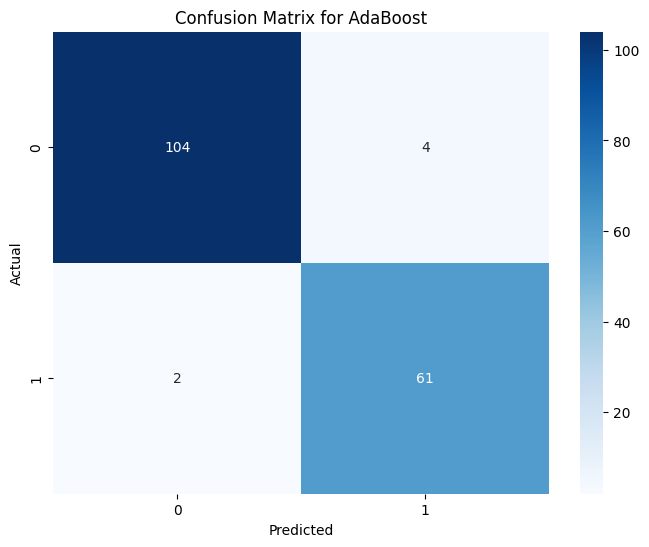

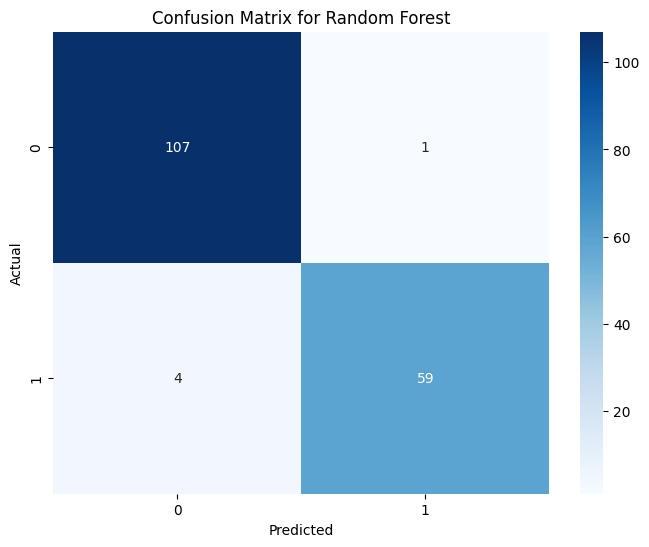

In [ ]:
# Create confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred_bagging)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for bagging')
plt.show()

# Create confusion matrix for AdaBoost predictions
conf_matrix_ada = confusion_matrix(y_test, y_pred_adaboost)

# Plot confusion matrix for AdaBoost
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost')
plt.show()

# Create confusion matrix for Random Forest predictions
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()


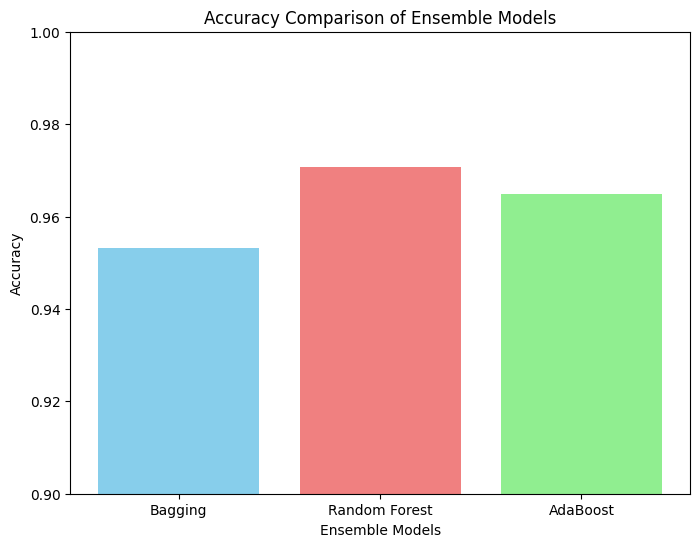

In [ ]:
# Compare the results of each ensemble model using graphs
# Bar plot for accuracy comparison
models = ['Bagging', 'Random Forest', 'AdaBoost']
accuracies = [accuracy_bagging, accuracy_rf, accuracy_adaboost]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Ensemble Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Ensemble Models')
plt.ylim(0.9, 1.0)
plt.show()



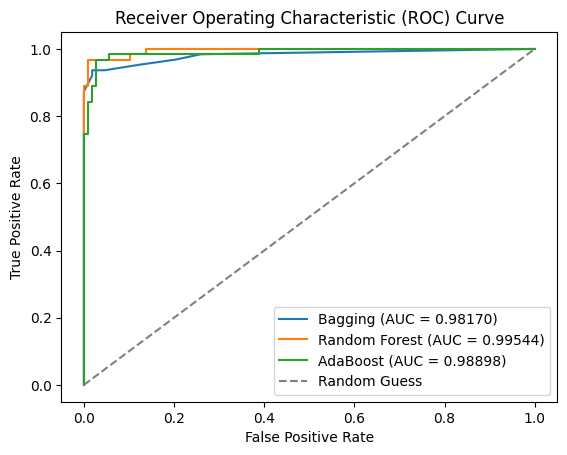

In [ ]:
# Task 10: Represent the ROC of training and test results in the graphs
# Calculate ROC curves for training set

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test contains your labels
# Encode 'B' as 0 and 'M' as 1
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

for clf, name in [(bagging_clf, 'Bagging'), (rf_clf, 'Random Forest'), (adaboost_clf, 'AdaBoost')]:
    y_score = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_encoded, y_score, pos_label=1)  # Specify pos_label=1 for 'M'
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.5f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
